In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


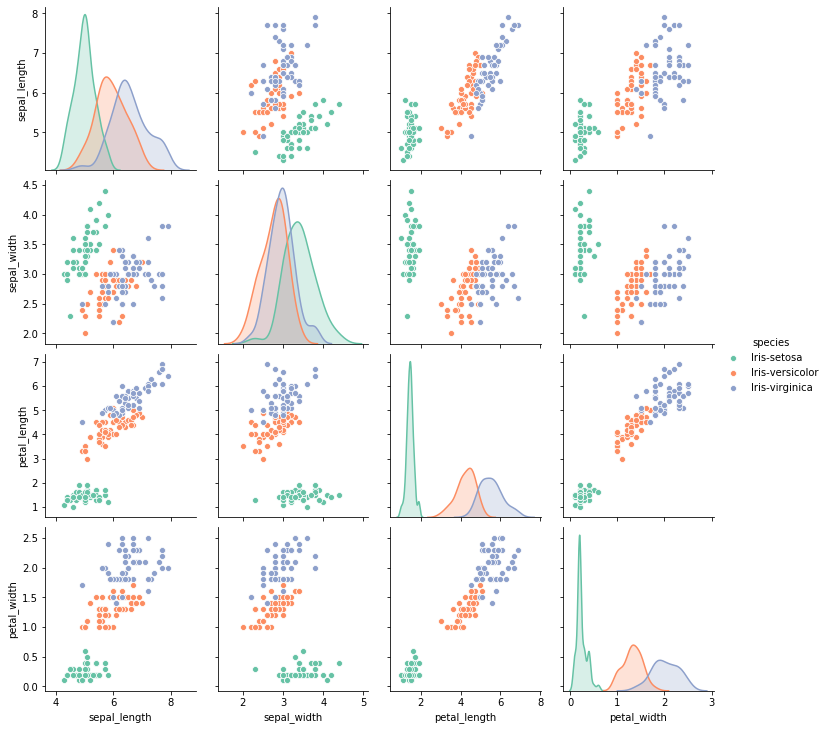

In [4]:
sns.pairplot(hue = "species", palette = "Set2", data = df)
plt.show()

* IRIS_SETOSA IS THE MOST & EASILY SEPERABLE FLOWER CLASS IN THE GROUP OF FLOWERS.

In [5]:
flowers = df.loc[:,["sepal_length", "sepal_width", "petal_length", "petal_width"]]

# K MEANS CLUSTERING

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters = 99)

In [8]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(flowers)
    wcss.append(kmeans.inertia_)

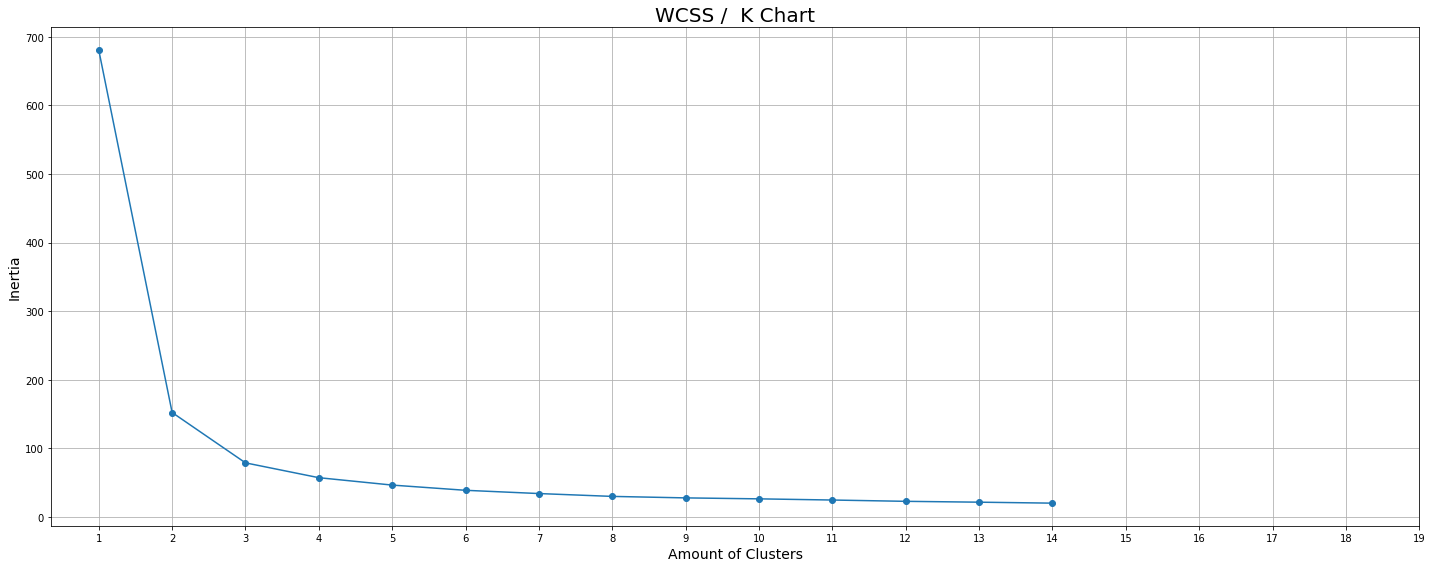

In [9]:
plt.figure(figsize = (20,8))
plt.title("WCSS /  K Chart", fontsize = 20)
plt.plot(range(1,15), wcss, "-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

* WE GOT THREE CLUSTERS BY USING ELBOW METHOD. WE CAN CONSIDER THOSE VALUES, ELSE WE CAN DOUBLE CHECK BY DOING TRIAL & ERROR METHOD

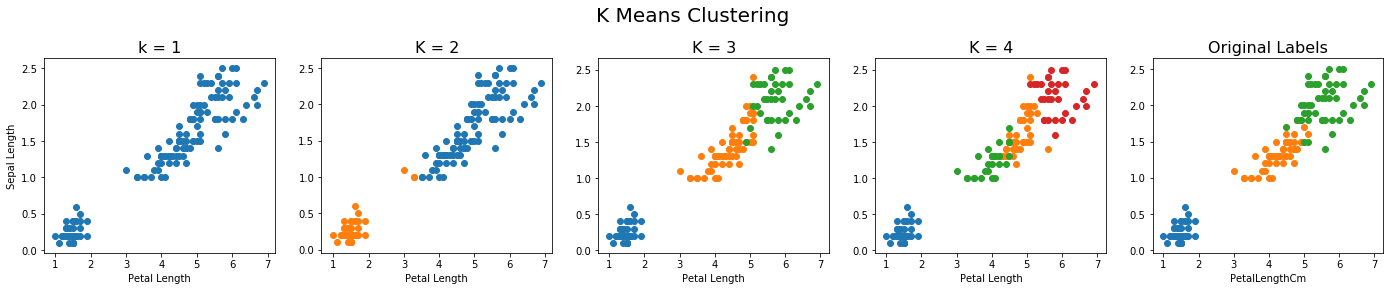

In [10]:
plt.figure(figsize = (24,4))
plt.suptitle("K Means Clustering", fontsize = 20)
plt.subplot(1,5,1)
plt.title("k = 1", fontsize = 16)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.scatter(flowers.petal_length, flowers.petal_width)

plt.subplot(1,5,2)
plt.title("K = 2", fontsize = 16)
plt.xlabel("Petal Length")
kmeans = KMeans(n_clusters=2)
flowers['labels'] = kmeans.fit_predict(flowers)
plt.scatter(flowers.petal_length[flowers.labels == 0], flowers.petal_width[flowers.labels == 0])
plt.scatter(flowers.petal_length[flowers.labels == 1], flowers.petal_width[flowers.labels == 1])

flowers.drop(['labels'], axis = 1, inplace = True)

plt.subplot(1,5,3)
plt.title("K = 3", fontsize = 16)
plt.xlabel("Petal Length")
kmeans = KMeans(n_clusters=3)
flowers['labels'] = kmeans.fit_predict(flowers)
plt.scatter(flowers.petal_length[flowers.labels == 0], flowers.petal_width[flowers.labels == 0])
plt.scatter(flowers.petal_length[flowers.labels == 1], flowers.petal_width[flowers.labels == 1])
plt.scatter(flowers.petal_length[flowers.labels == 2], flowers.petal_width[flowers.labels == 2])

flowers.drop(['labels'], axis = 1, inplace = True)

plt.subplot(1,5,4)
plt.title("K = 4", fontsize = 16)
plt.xlabel("Petal Length")
kmeans = KMeans(n_clusters=4)
flowers['labels'] = kmeans.fit_predict(flowers)
plt.scatter(flowers.petal_length[flowers.labels == 0], flowers.petal_width[flowers.labels == 0])
plt.scatter(flowers.petal_length[flowers.labels == 1], flowers.petal_width[flowers.labels == 1])
plt.scatter(flowers.petal_length[flowers.labels == 2], flowers.petal_width[flowers.labels == 2])
plt.scatter(flowers.petal_length[flowers.labels == 3], flowers.petal_width[flowers.labels == 3])

flowers.drop(['labels'], axis = 1, inplace = True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.petal_length[df.species == "Iris-setosa"],df.petal_width[df.species == "Iris-setosa"])
plt.scatter(df.petal_length[df.species == "Iris-versicolor"],df.petal_width[df.species == "Iris-versicolor"])
plt.scatter(df.petal_length[df.species == "Iris-virginica"],df.petal_width[df.species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
cluster = AgglomerativeClustering(n_clusters=99) # AS WE DON'T KNOW HOW MANY CLUSTERS ARE THERE WE GONNS CHECK BY MEANS OF TRAIL AND ERROR METHOD# 

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

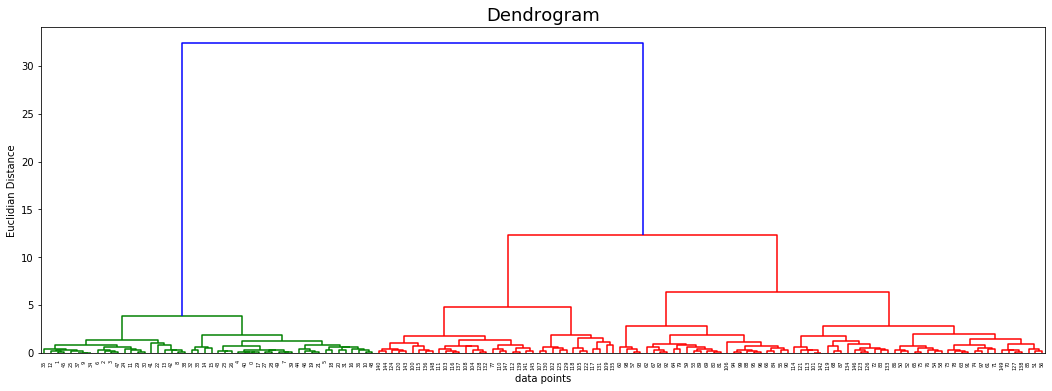

In [14]:
merg = linkage(flowers, method = "ward")
plt.figure(figsize = (18,6))
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("Euclidian Distance")
plt.title("Dendrogram", fontsize = 18)
plt.show()

# CROSS VERIFYING WHETHER THE DENDROGRAM IS CORRECT OR NOT 

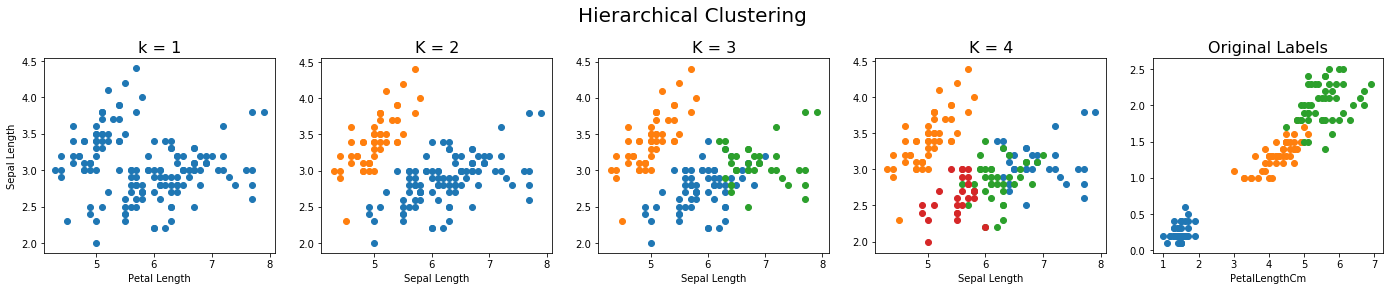

In [15]:
plt.figure(figsize = (24,4))
plt.suptitle("Hierarchical Clustering", fontsize = 20)

plt.subplot(1,5,1)
plt.title("k = 1", fontsize = 16)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.scatter(flowers.sepal_length, flowers.sepal_width)

plt.subplot(1,5,2)
plt.title("K = 2", fontsize = 16)
plt.xlabel("Sepal Length")
clustering = AgglomerativeClustering(n_clusters=2)
flowers['labels'] = clustering.fit_predict(flowers)
plt.scatter(flowers.sepal_length[flowers.labels == 0], flowers.sepal_width[flowers.labels == 0])
plt.scatter(flowers.sepal_length[flowers.labels == 1], flowers.sepal_width[flowers.labels == 1])

flowers.drop(['labels'], axis = 1, inplace = True)

plt.subplot(1,5,3)
plt.title("K = 3", fontsize = 16)
plt.xlabel("Sepal Length")
clustering = AgglomerativeClustering(n_clusters=3)
flowers['labels'] = clustering.fit_predict(flowers)
plt.scatter(flowers.sepal_length[flowers.labels == 0], flowers.sepal_width[flowers.labels == 0])
plt.scatter(flowers.sepal_length[flowers.labels == 1], flowers.sepal_width[flowers.labels == 1])
plt.scatter(flowers.sepal_length[flowers.labels == 2], flowers.sepal_width[flowers.labels == 2])

flowers.drop(['labels'], axis = 1, inplace = True)

plt.subplot(1,5,4)
plt.title("K = 4", fontsize = 16)
plt.xlabel("Sepal Length")
clustering = AgglomerativeClustering(n_clusters=4)
flowers['labels'] = clustering.fit_predict(flowers)
plt.scatter(flowers.sepal_length[flowers.labels == 0], flowers.sepal_width[flowers.labels == 0])
plt.scatter(flowers.sepal_length[flowers.labels == 1], flowers.sepal_width[flowers.labels == 1])
plt.scatter(flowers.sepal_length[flowers.labels == 2], flowers.sepal_width[flowers.labels == 2])
plt.scatter(flowers.sepal_length[flowers.labels == 3], flowers.sepal_width[flowers.labels == 3])

flowers.drop(['labels'], axis = 1, inplace = True)
plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.petal_length[df.species == "Iris-setosa"],df.petal_width[df.species == "Iris-setosa"])
plt.scatter(df.petal_length[df.species == "Iris-versicolor"],df.petal_width[df.species == "Iris-versicolor"])
plt.scatter(df.petal_length[df.species == "Iris-virginica"],df.petal_width[df.species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

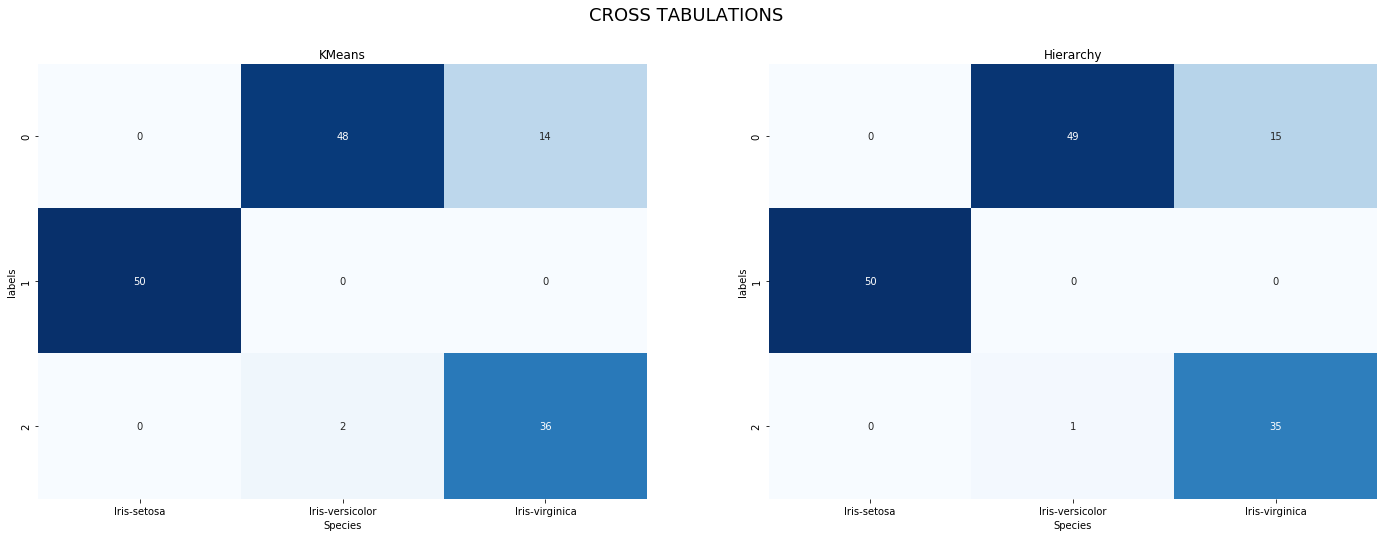

In [16]:
# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(flowers)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":df['species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])

# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(flowers)

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':hc_predict,"Species":df['species']})
ct2 = pd.crosstab(df2['labels'],df2['Species'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()

